# Scaling Exercise

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from wrangle_zillow import wrangle_zillow

In [2]:
train, validate, test = wrangle_zillow()

## Visualize Scalers

In [3]:
def visualize_scaler(scaler, df, target_columns, bins=10):
    fig, axs = plt.subplots(len(target_columns), 2, figsize=(16, 9))
    df_scaled = df.copy()
    df_scaled[target_columns] = scaler.fit_transform(df[target_columns])
    for (ax1, ax2), col in zip(axs, target_columns):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()
    return fig, axs

(<Figure size 1152x648 with 6 Axes>,
 array([[<AxesSubplot:title={'center':'bedrooms before scaling'}, xlabel='bedrooms', ylabel='count'>,
         <AxesSubplot:title={'center':'bedrooms after scaling with MinMaxScaler'}, xlabel='bedrooms', ylabel='count'>],
        [<AxesSubplot:title={'center':'area before scaling'}, xlabel='area', ylabel='count'>,
         <AxesSubplot:title={'center':'area after scaling with MinMaxScaler'}, xlabel='area', ylabel='count'>],
        [<AxesSubplot:title={'center':'tax_value before scaling'}, xlabel='tax_value', ylabel='count'>,
         <AxesSubplot:title={'center':'tax_value after scaling with MinMaxScaler'}, xlabel='tax_value', ylabel='count'>]],
       dtype=object))

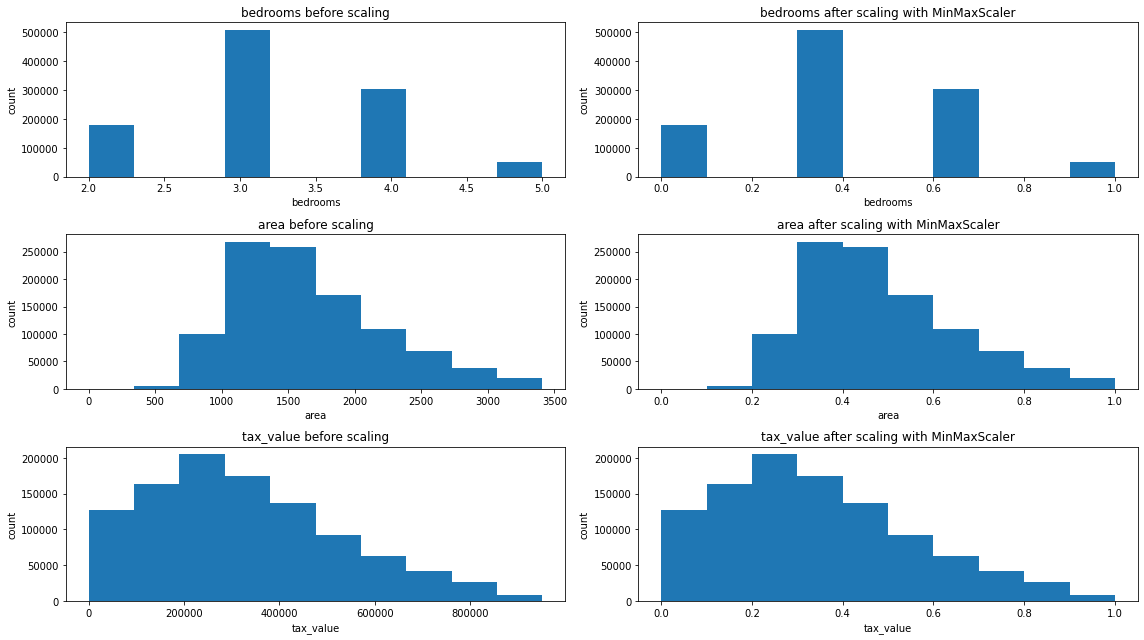

In [4]:
visualize_scaler(
    scaler=MinMaxScaler(),
    df=train,
    target_columns=['bedrooms', 'area', 'tax_value'],
)

(<Figure size 1152x648 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'bedrooms before scaling'}, xlabel='bedrooms', ylabel='count'>,
         <AxesSubplot:title={'center':'bedrooms after scaling with QuantileTransformer'}, xlabel='bedrooms', ylabel='count'>],
        [<AxesSubplot:title={'center':'tax_value before scaling'}, xlabel='tax_value', ylabel='count'>,
         <AxesSubplot:title={'center':'tax_value after scaling with QuantileTransformer'}, xlabel='tax_value', ylabel='count'>]],
       dtype=object))

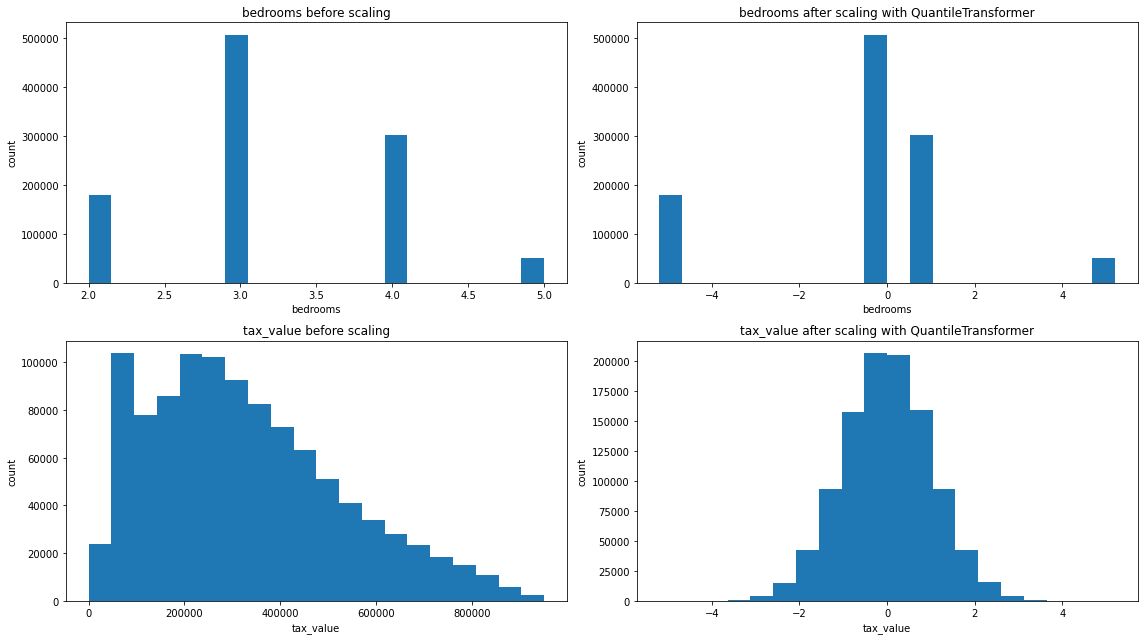

In [5]:
visualize_scaler(
    scaler=QuantileTransformer(output_distribution='normal'),
    df=train,
    target_columns=['bedrooms', 'tax_value'],
    bins=20,
)

## Inverse Transform

In [6]:
scaler = MinMaxScaler()
original_data = train[['tax_value']]
scaled_data = scaler.fit_transform(original_data)

(scaler.inverse_transform(scaled_data) == original_data).all()
# np.isclose(scaler.inverse_transform(scaled_data), original_data).all()

tax_value    False
dtype: bool

## Pipeline Function

In [7]:
def scale_data(train, validate, test, return_scaler=False):
    '''
    Scales the 3 data splits.
    
    takes in the train, validate, and test data splits and returns their scaled counterparts.
    
    If return_scaler is true, the scaler object will be returned as well.
    '''
    columns_to_scale = ['bedrooms', 'bathrooms', 'tax_value', 'taxamount', 'area']
    
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    scaler = MinMaxScaler()
    scaler.fit(train[columns_to_scale])
    
    train_scaled[columns_to_scale] = scaler.transform(train[columns_to_scale])
    validate_scaled[columns_to_scale] = scaler.transform(validate[columns_to_scale])
    test_scaled[columns_to_scale] = scaler.transform(test[columns_to_scale])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled